In [2]:
# Creating dataset
import numpy as np
np.random.seed(42)
X = np.random.multivariate_normal(
    mean=[2, 0],
    cov=[[3, 1], [1, 2]],  # covariance matrix
    size=100
)
print(X[0:5,])

[[ 1.28175166e+00 -6.34978454e-01]
 [ 1.07337141e-02  8.75341318e-01]
 [ 2.52357272e+00  1.64177742e-05]
 [-1.02952076e+00 -8.11778086e-01]
 [ 2.42430497e+00  1.01203443e+00]]


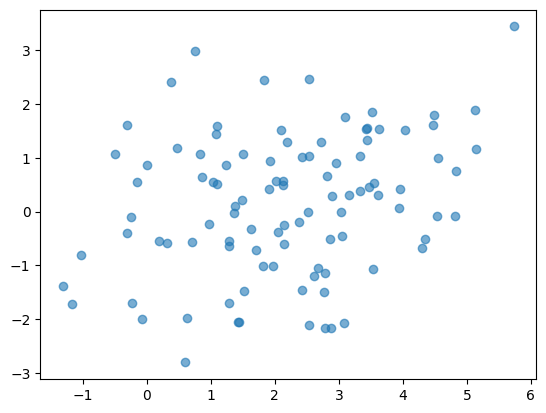

In [3]:
# Visulatization of dataset
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], alpha=0.6)
plt.show()


In [4]:
# Centering data: because we have features with same unit. for diffenent unit data we standardlize it first 
X_meaned = X - np.mean(X, axis=0) # Shifts it to (0,0)
print("Mean of X: ", np.mean(X, axis=0))
print(X_meaned[0:5,])

Mean of X:  [2.16595994 0.14958658]
[[-0.88420828 -0.78456503]
 [-2.15522623  0.72575474]
 [ 0.35761278 -0.14957016]
 [-3.1954807  -0.96136467]
 [ 0.25834503  0.86244785]]


In [5]:
# Covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False) # rowvar=false, let us calculate variance between features/columns
print(cov_matrix)

[[2.35611878 0.54218943]
 [0.54218943 1.67569832]]


In [6]:
# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eigen Values(tells variance): ", eigenvalues)
print("Eigen Vectord(tells direction(PCA)): ", eigenvectors)

Eigen Values(tells variance):  [1.37582076 2.65599634]
Eigen Vectord(tells direction(PCA)):  [[ 0.48399092 -0.87507302]
 [-0.87507302 -0.48399092]]


In [7]:
# Sort by importance
sorted_idx = np.argsort(eigenvalues)[::-1] #[::-1] : let us get values in descending order
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]
print("sorted index: ", sorted_idx)
print("sorted eigen values index: ", eigenvalues)
print("sorted eigen vectors index: ", eigenvectors)


sorted index:  [1 0]
sorted eigen values index:  [2.65599634 1.37582076]
sorted eigen vectors index:  [[-0.87507302  0.48399092]
 [-0.48399092 -0.87507302]]


In [8]:
# Projecting data on these vectors
X_pca = np.dot(X_meaned, eigenvectors) # X: (100,2), eigenvector: (2,2) --> (100,2)
print(X_pca[:5,])


[[ 1.15346917  0.25860291]
 [ 1.53472162 -1.67819831]
 [-0.24054669  0.30396615]
 [ 3.26157071 -0.70531936]
 [-0.64348769 -0.6296682 ]]


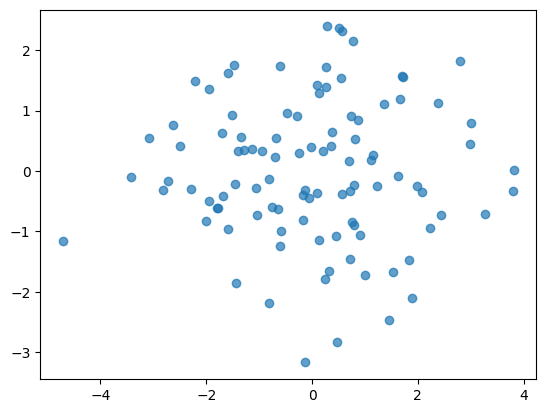

In [9]:
# plot of X_pca
plt.scatter(X_pca[:,0], X_pca[:, 1], alpha=0.7)
plt.show()

[np.float64(0.6587591335882401), np.float64(0.34124086641176005)]


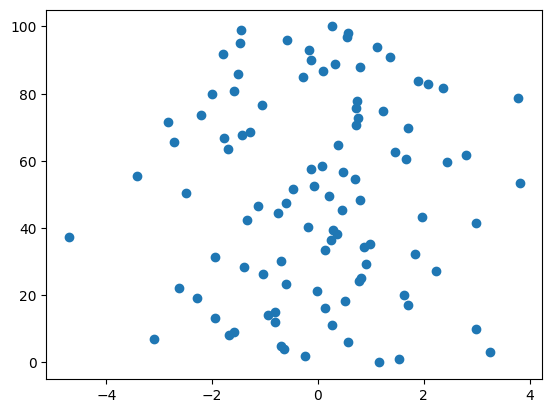

In [10]:
# How much variance first PCA holds
print([eigenvalue/sum(eigenvalues) for eigenvalue in eigenvalues]) 
# So, our PCA1 holds 65% of data lets see what it looks like
plt.scatter(X_pca[:,0], y=np.linspace(0, 100, 100))
plt.show()
# Looks preety much same as original

[2.16595994 0.14958658]


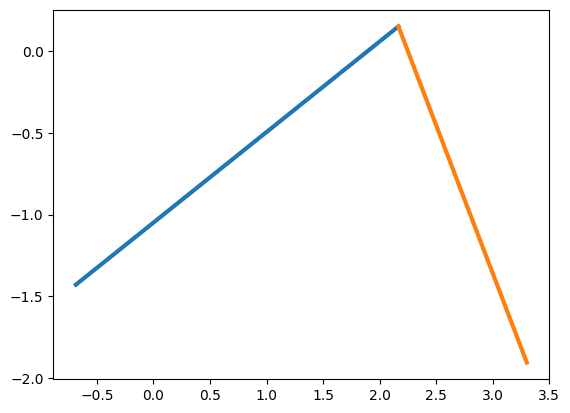

In [11]:
# Visualising PCs
origin = np.mean(X, axis=0)
print(origin)
for i in range(2):
    vec = eigenvectors[:,i] * np.sqrt(eigenvalues[i]) * 2
    plt.plot([origin[0], origin[0]+vec[0]], [origin[1], origin[1]+vec[1]], 
             linewidth=3, label=f"PC{i+1}")
